In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import trace_gen as tg

In [28]:
def mrc_ird_plot(file):
    file_path = f'/opt/traces/{file}_r.txt'
    trace = np.loadtxt(file_path, dtype=np.int32)
    trace[:, 0] += 7
    trace = tg.squash(tg.unroll(trace // 8))
    M = len(set(trace))
    K = M // 100
    c = np.arange(K, M, K*5)
    hr_lru = [tg.sim_lru(_c, trace, raw=True) for _c in c]
    hr_fifo = [tg.sim_fifo(_c, trace, raw=True) for _c in c]
    hr_clock = [tg.sim_clock(_c, trace, raw=True) for _c in c]
    
    # Plot MRC
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
    axs[0].plot(c, hr_lru, '-+', label='LRU')
    axs[0].plot(c, hr_fifo, label='FIFO')
    axs[0].plot(c, hr_clock, label='CLOCK')
    axs[0].set_xlabel('Cache size (C)')
    axs[0].set_ylabel('Hit rate')
    axs[0].legend()
    axs[0].set_title(f'{file} MRC')

    # Plot IRD
    ird = tg.iad(trace)
    ird = ird[ird > -1]
    axs[1].hist(ird, bins=100, log=True)
    axs[1].set_xlabel('Inter-reference distance')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title(f'{file} IRD')

    plt.show()

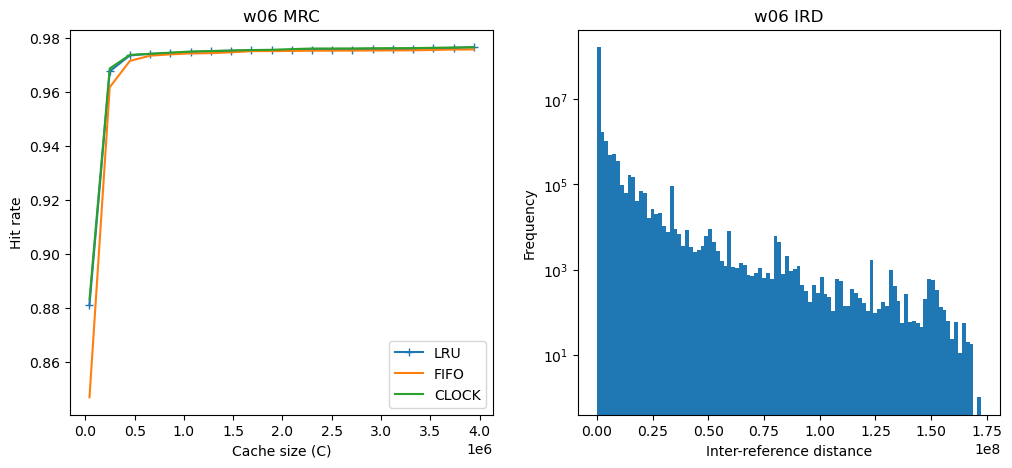

In [29]:
mrc_ird_plot('w06')

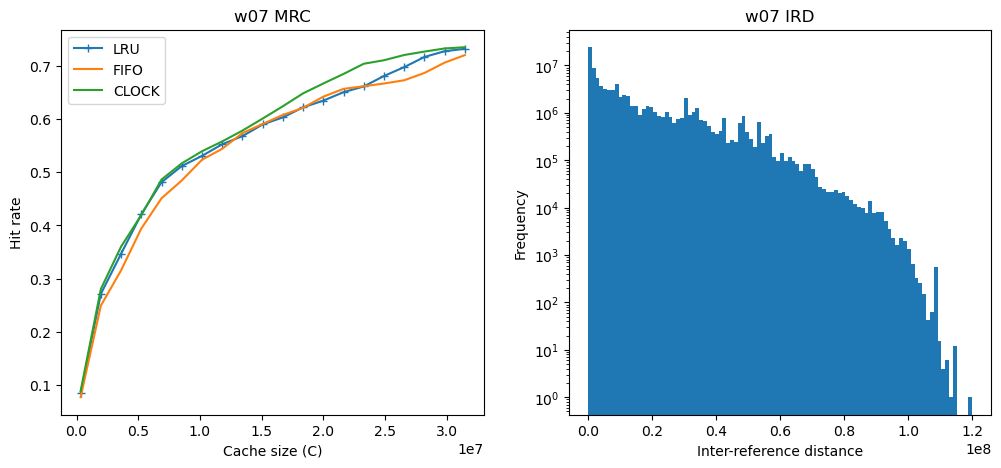

In [30]:
mrc_ird_plot('w07')

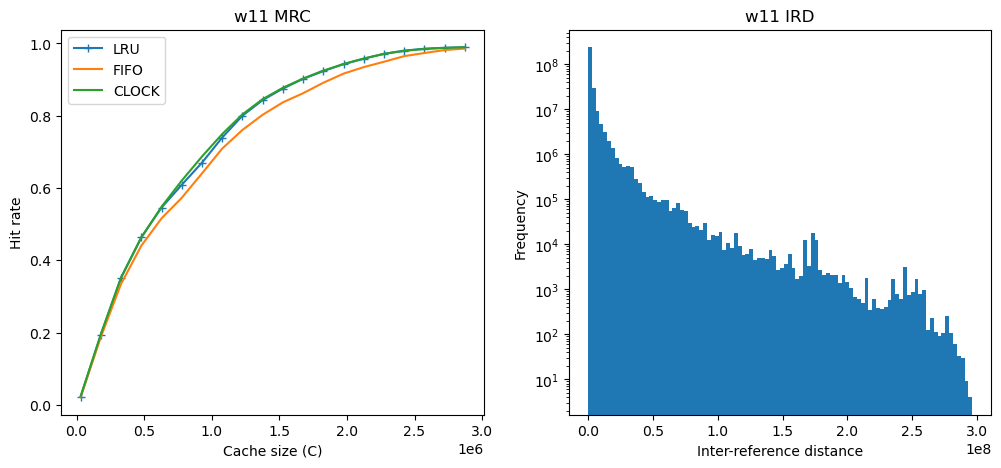

In [31]:
mrc_ird_plot('w11')

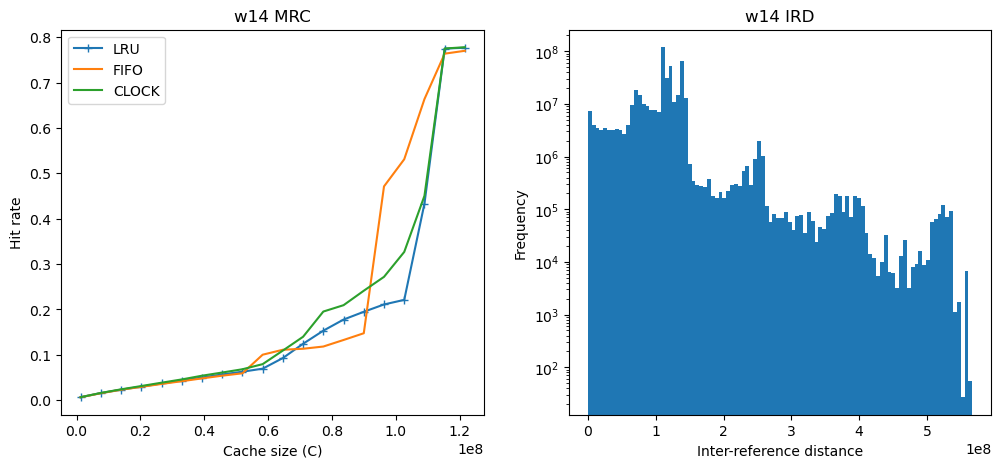

In [33]:
mrc_ird_plot('w14')

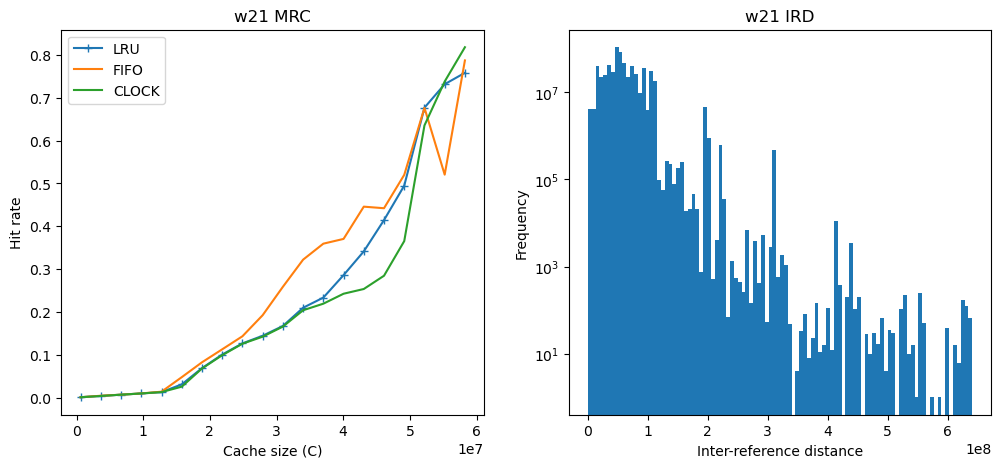

In [34]:
mrc_ird_plot('w21')

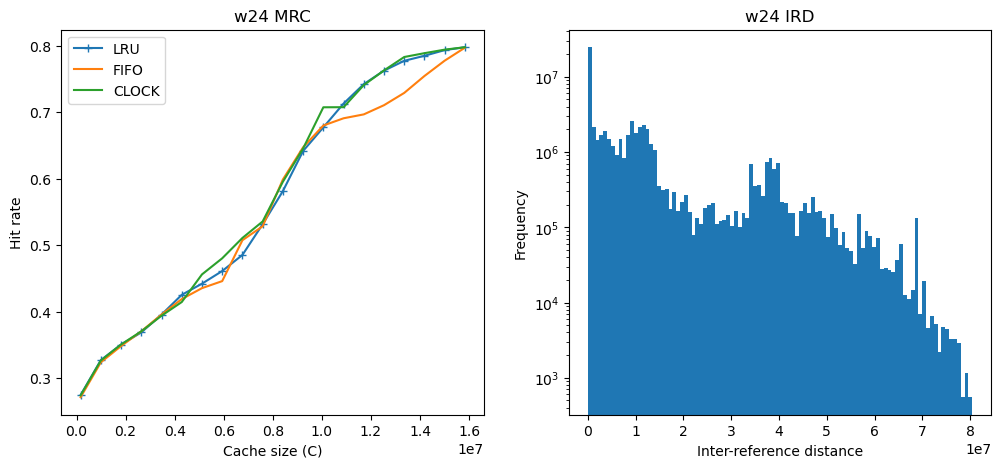

In [32]:
mrc_ird_plot('w24')

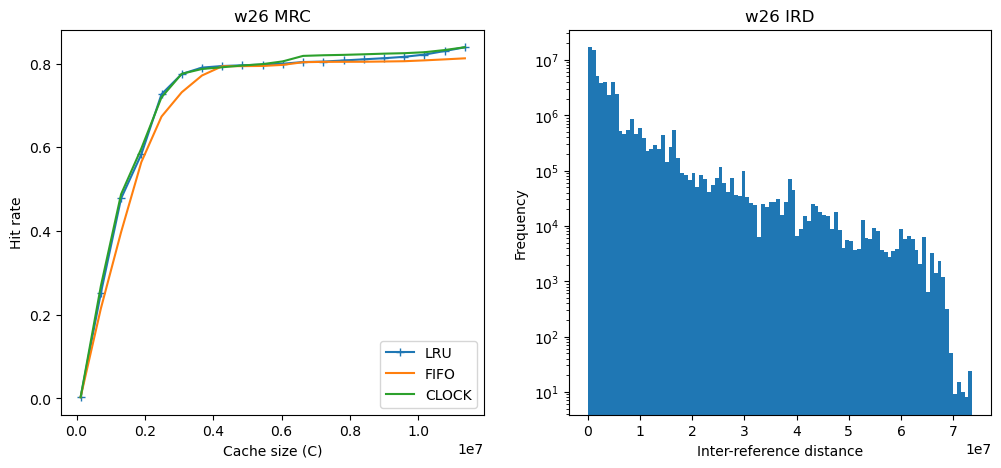

In [35]:
mrc_ird_plot('w26')

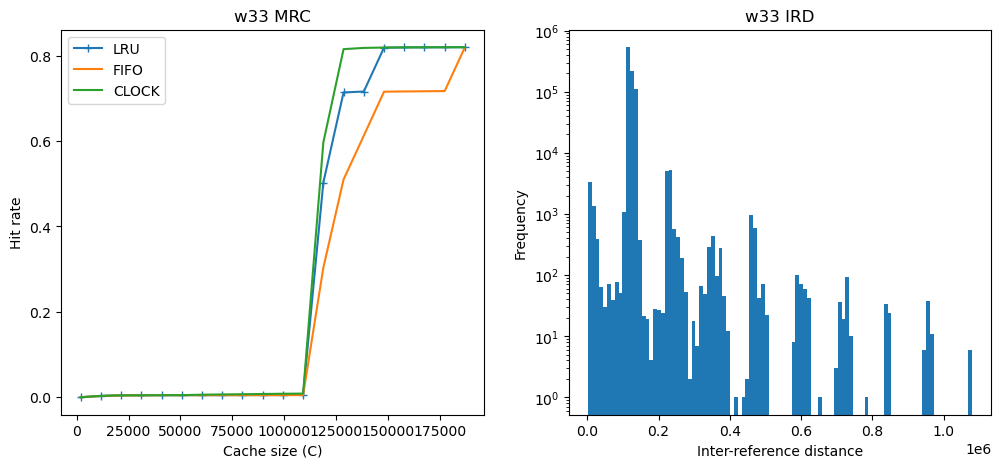

In [36]:
mrc_ird_plot('w33')

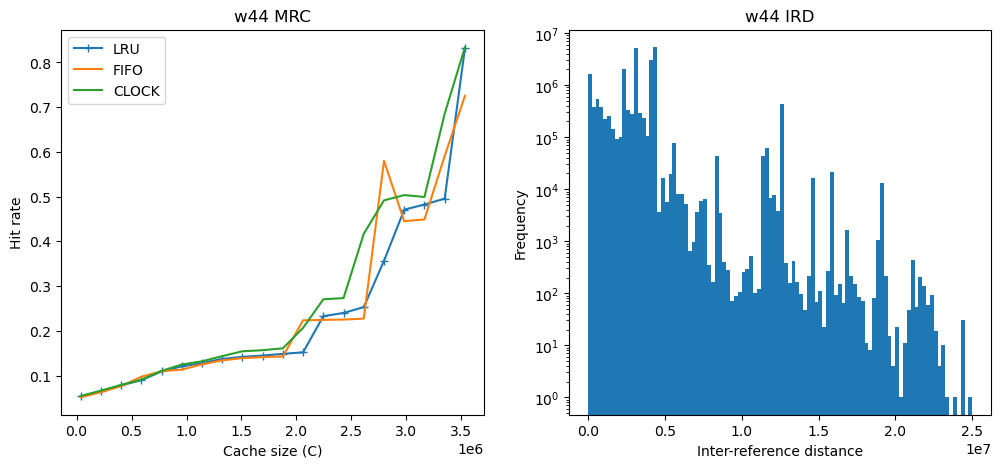

In [37]:
mrc_ird_plot('w44')

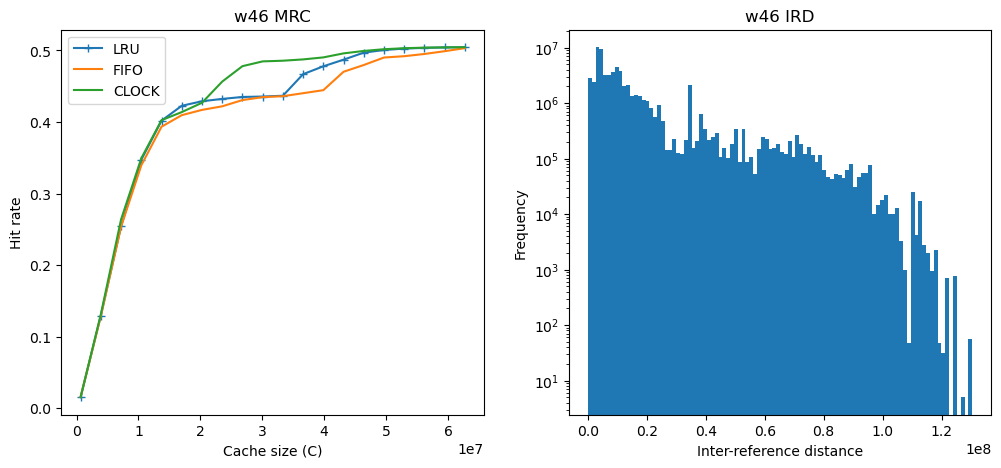

In [38]:
mrc_ird_plot('w46')

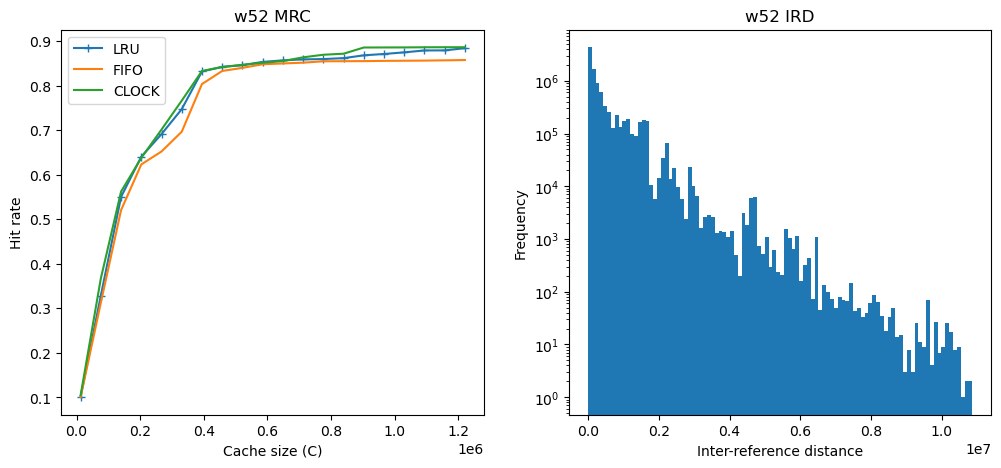

In [48]:
mrc_ird_plot('w52')

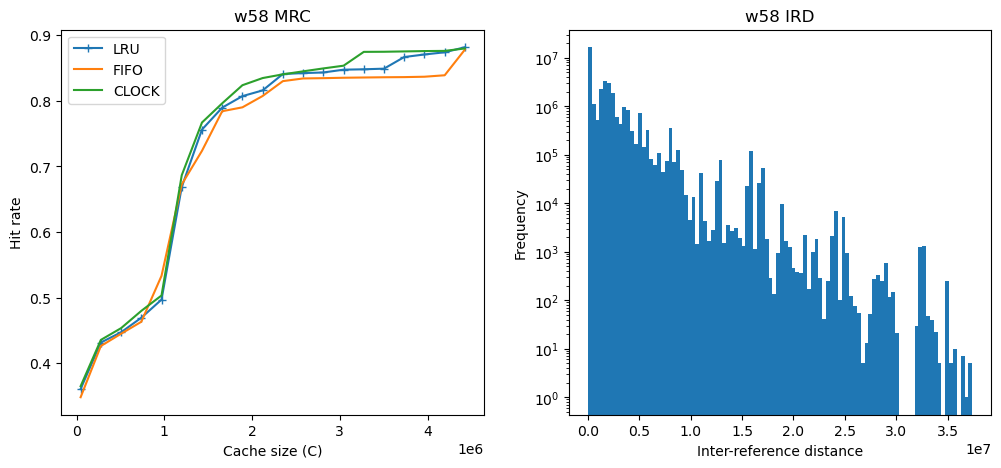

In [39]:
mrc_ird_plot('w58')

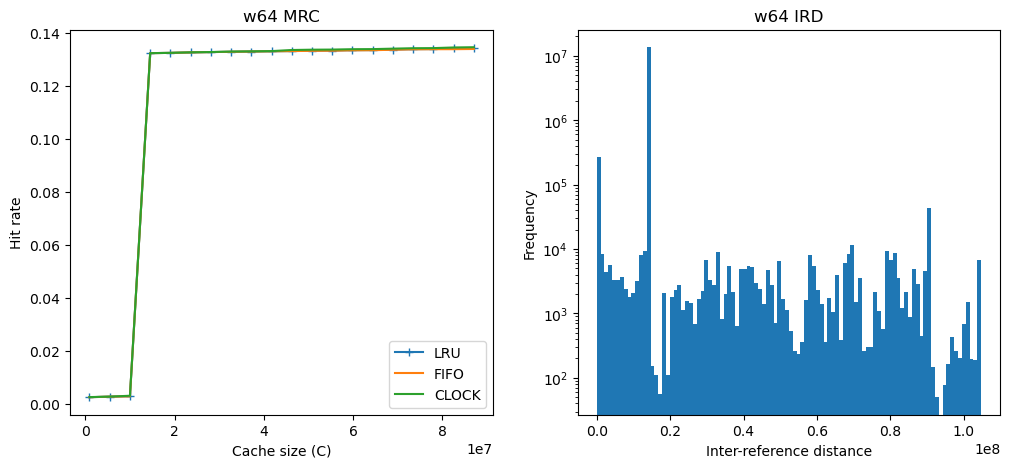

In [40]:
mrc_ird_plot('w64')

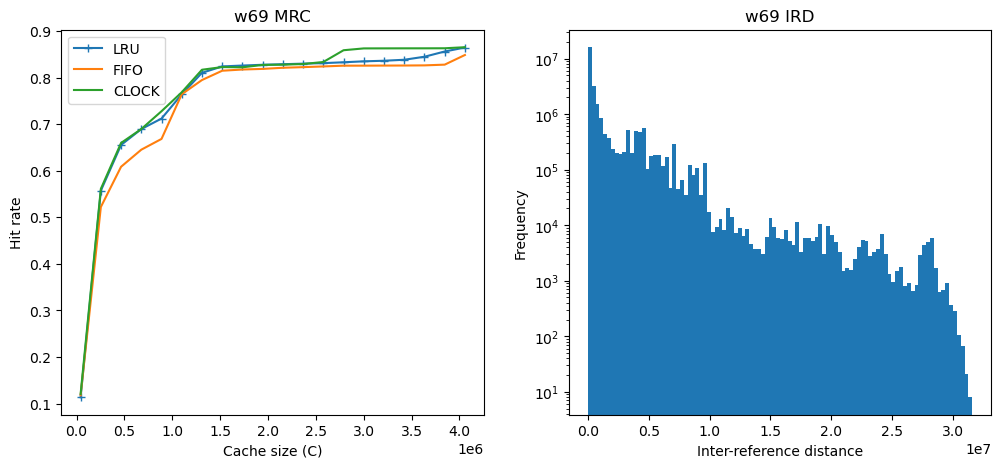

In [44]:
mrc_ird_plot('w69')

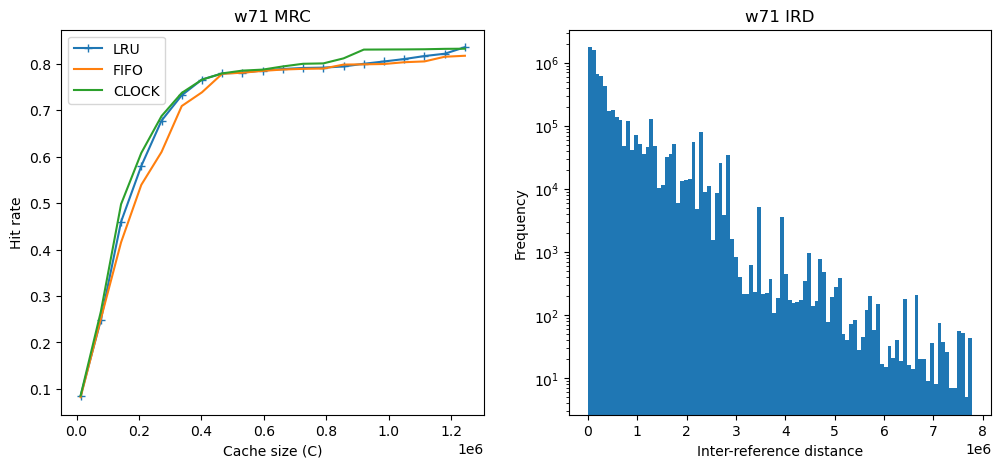

In [41]:
mrc_ird_plot('w71')

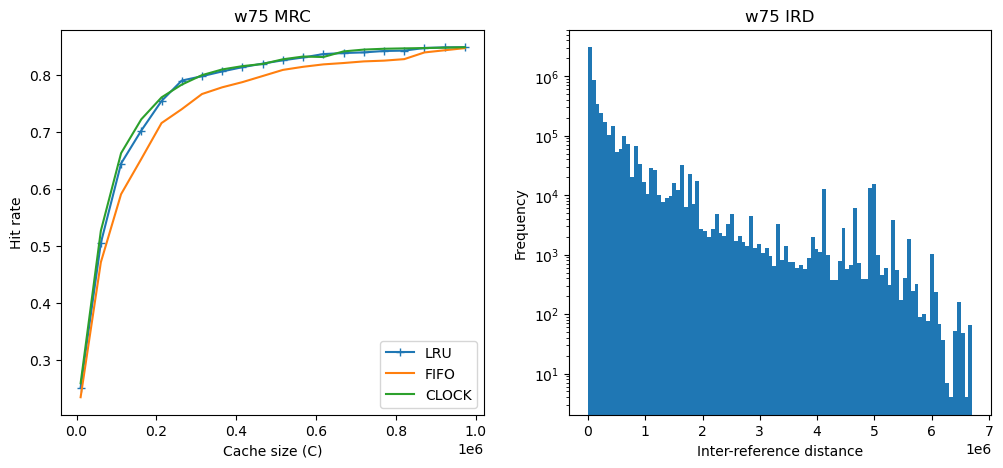

In [42]:
mrc_ird_plot('w75')

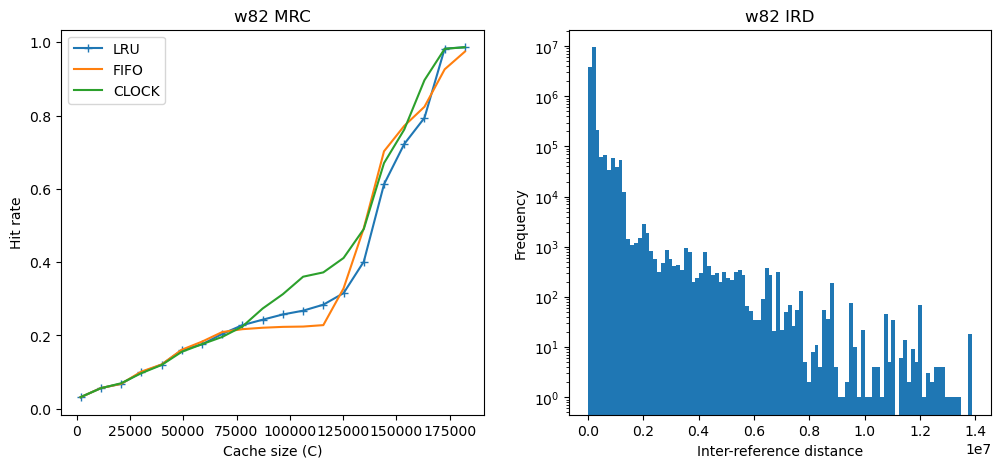

In [43]:
mrc_ird_plot('w82')

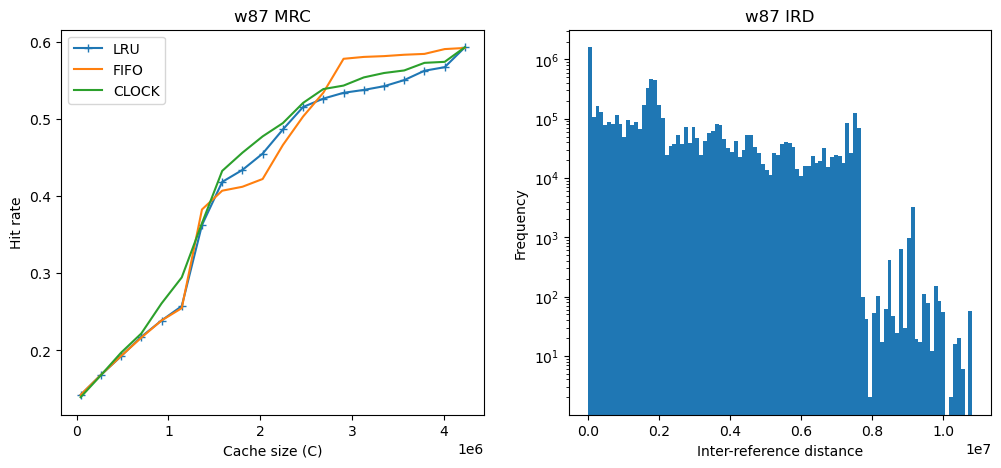

In [45]:
mrc_ird_plot('w87')

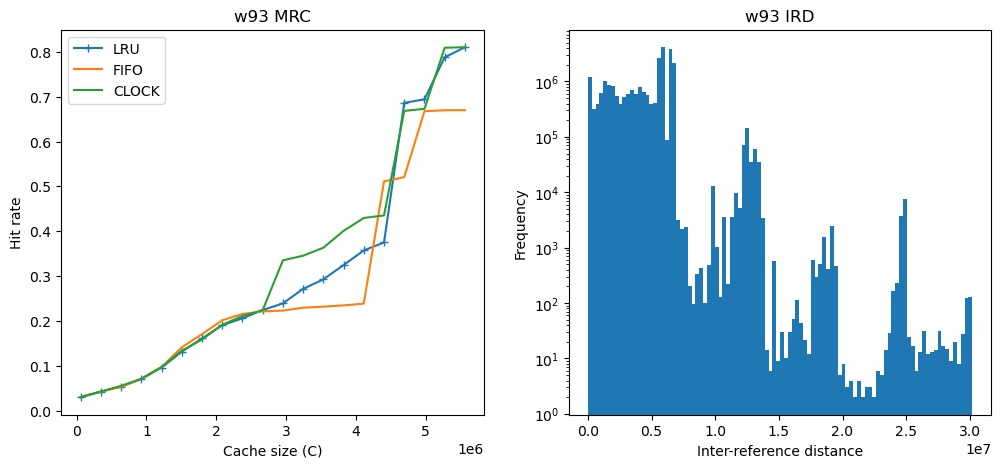

In [46]:
mrc_ird_plot('w93')

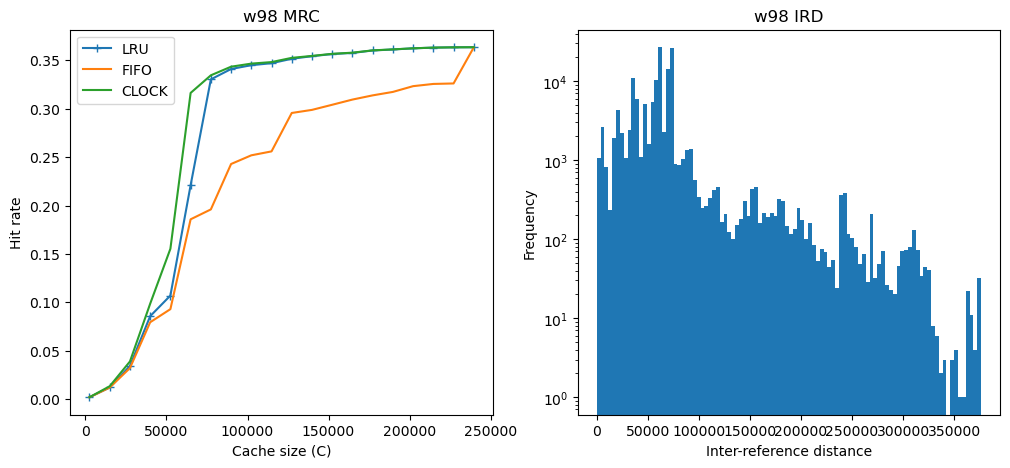

In [49]:
mrc_ird_plot('w98')

In [5]:
def recon_plot(file):
    file_path = f'/opt/traces/{file}_r.txt'
    trace = np.loadtxt(file_path, dtype=np.int32)
    recon = tg.TraceReconstructor(trace)
    K = recon.M // 100
    c = np.arange(K, recon.M, K*10)
    hr_lru = [tg.sim_lru(_c, trace) for _c in c]
    length = len(recon.trace)//4
    recon.generate_irm_trace(length)
    hr_lru_irm_recon = [tg.sim_lru(_c, recon.irm_trace) for _c in c]
    recon.generate_ird_trace(length)
    hr_lru_ird_recon = [tg.sim_lru(_c, recon.ird_trace) for _c in c]

    # Plot MRC
    plt.plot(c, hr_lru, label='Original')
    plt.plot(c, hr_lru_irm_recon, label='Frequency-reconstructed')
    plt.plot(c, hr_lru_ird_recon, label='IRD-reconstructed')
    plt.xlabel('Cache size')
    plt.ylabel('Hit rate')
    plt.legend()
    plt.title(file)
    plt.show()
    

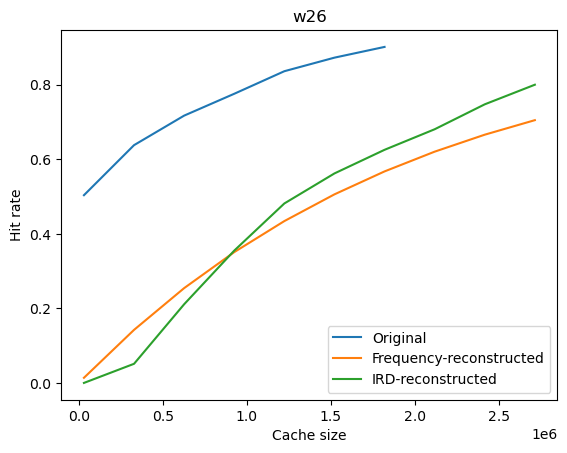

In [6]:
recon_plot('w26')